# Module 1 Exam
### Hyesoo Choi (Heh-soo Choi)
Load the image "Input.png". Using OpenCV, NumPy, and Matplotlib, construct a processing pipeline to generate a masked image resembling "Output.png". You're free to reference any class materials or notes for assistance.

(1087, 1480, 3)


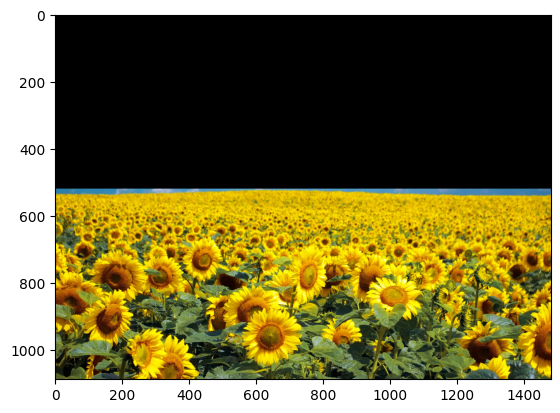

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
input_img = cv2.imread("Input.png")
# convert bgr to rgb
img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
# convert rgb to hsv
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
print(input_img.shape)

# making a mask for sunflowers area using bitwise-and
mask = np.zeros(img_rgb.shape[:2], np.uint8)
mask[520:1087, 0:1480] = 255

img_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_masked)



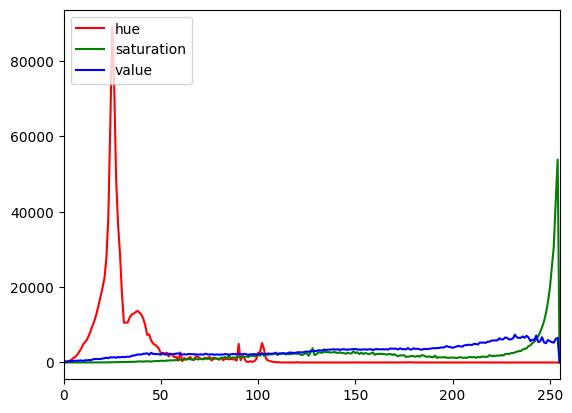

In [40]:
# calculate the histogram of masked area to analyze colors range
hist = cv2.calcHist([img_hsv], [0], mask, [256], [0, 255])
plt.plot(hist, color='red')
plt.xlim([0,255])

hist = cv2.calcHist([img_hsv], [1], mask, [256], [0, 255])
plt.plot(hist, color='green')
plt.xlim([0,255])

hist = cv2.calcHist([img_hsv], [2], mask, [256], [0, 255])
plt.plot(hist, color='blue')
plt.xlim([0,255])

plt.legend(["hue", "saturation", "value"], loc = 'upper left')
plt.show()




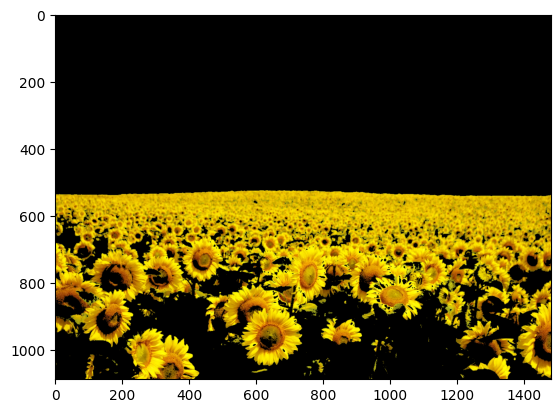

In [41]:
# Using the above hsv range, creating a mask
mask = np.zeros(img_rgb.shape[:2], np.uint8)

# min_HSV = [h min, s min, v min] in histogram (estimate value)
# max_HSV = [h max, s max, v max] in histogram (estimate value)
min_hsv = np.array([0, 200, 110])
max_hsv = np.array([95, 255, 255])

# use inRange function to complete the mask
mask = cv2.inRange(img_hsv, min_hsv, max_hsv)

# apply mask using bitwise_and
img_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_masked)